# FRAMEWORK FOR DATA AND VISUAL **ANALYTICS** - MINI PROJECT

# Bar Chart – Cost Comparison


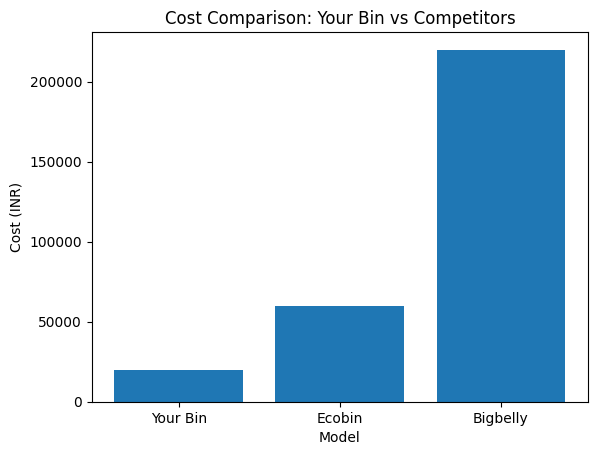

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("waste_bin_data.csv")
competitors = df[df['Category'] == 'Competitors']

plt.bar(competitors['Parameter'], competitors['Value_INR'])
plt.title("Cost Comparison: Your Bin vs Competitors")
plt.ylabel("Cost (INR)")
plt.xlabel("Model")
plt.show()


## Pie Chart – Cost Distribution (Prototype, Maintenance, Operation)

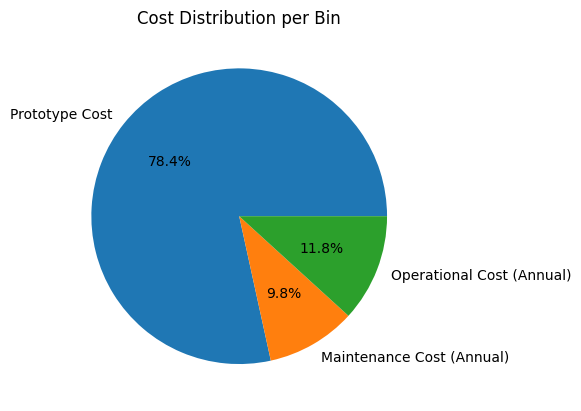

In [3]:
cost_df = df[df['Category'] == 'Cost']
plt.pie(cost_df['Value_INR'], labels=cost_df['Parameter'], autopct='%1.1f%%')
plt.title("Cost Distribution per Bin")
plt.show()


### **Bar Chart – Market Potential (TAM, SAM, SOM)**

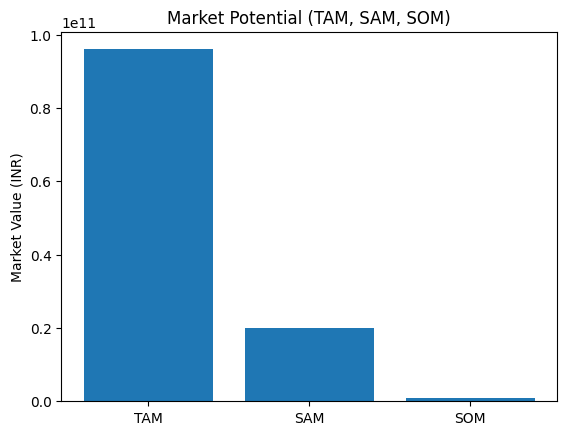

In [4]:
market_df = df[df['Category'] == 'Market']
plt.bar(market_df['Parameter'], market_df['Value_INR'])
plt.title("Market Potential (TAM, SAM, SOM)")
plt.ylabel("Market Value (INR)")
plt.show()


## **Radar Chart – Feasibility Evaluation**

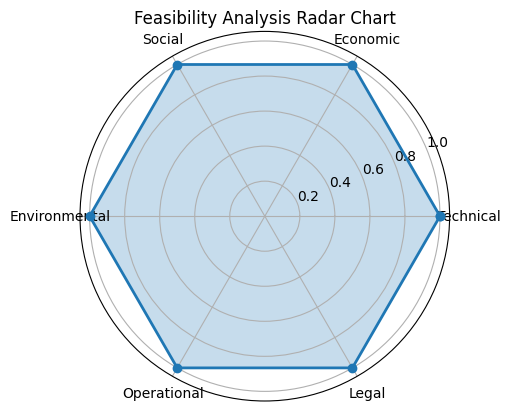

In [6]:
import numpy as np

feasibility_df = df[df['Category'] == 'Feasibility']
labels = feasibility_df['Parameter']
values = feasibility_df['Value_INR']

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values = values.tolist() + values.tolist()[:1] # Convert values to list before adding the first element
angles += angles[:1]

fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Feasibility Analysis Radar Chart")
plt.show()

# Heatmap + Treemap - Waste Bin Market & Cost Visualization

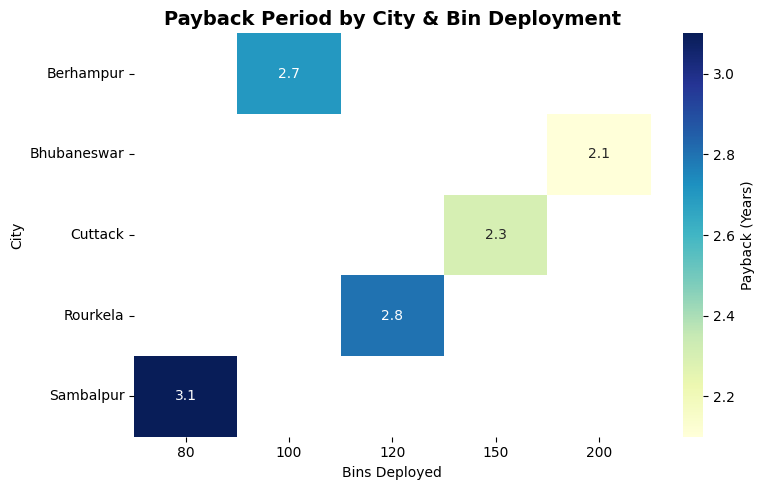

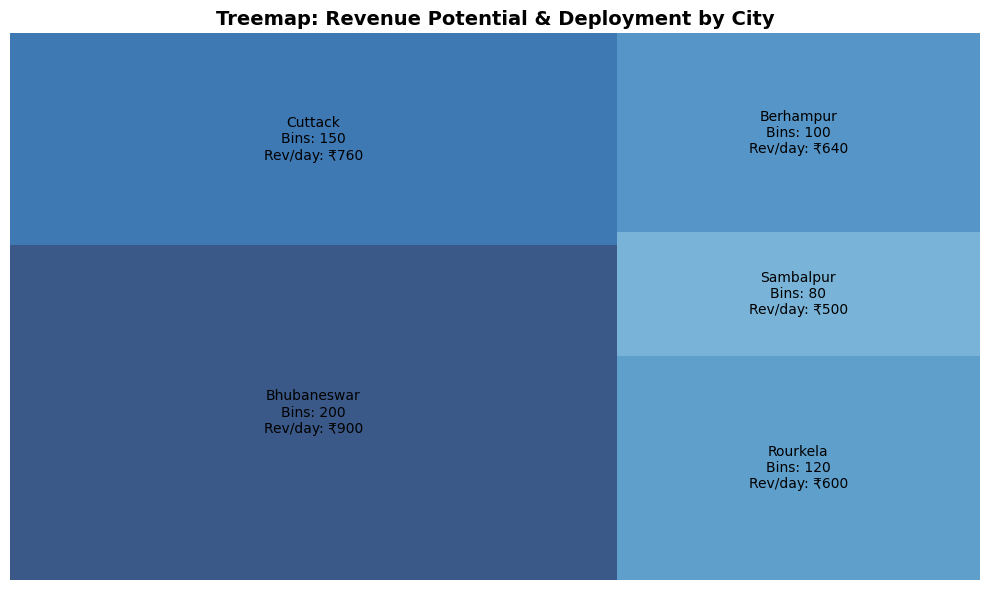

Summary Snapshot:

          City  Bins_Deployed  Revenue_INR_day  Payback_Years  \
0  Bhubaneswar            200              900            2.1   
1      Cuttack            150              760            2.3   
2     Rourkela            120              600            2.8   
3    Sambalpur             80              500            3.1   
4    Berhampur            100              640            2.7   

   Revenue_Year_INR  
0            328500  
1            277400  
2            219000  
3            182500  
4            233600  


In [9]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


data = {
    'City': ['Bhubaneswar', 'Cuttack', 'Rourkela', 'Sambalpur', 'Berhampur'],
    'Bins_Deployed': [200, 150, 120, 80, 100],
    'Avg_Waste_kg_day': [45, 38, 30, 25, 32],
    'Revenue_INR_day': [900, 760, 600, 500, 640],
    'Maintenance_INR_year': [4800, 4600, 4200, 4000, 4100],
    'Payback_Years': [2.1, 2.3, 2.8, 3.1, 2.7]
}
df = pd.DataFrame(data)


plt.figure(figsize=(8, 5))
heat_data = df.pivot_table(values='Payback_Years',
                           index='City',
                           columns='Bins_Deployed')

sns.heatmap(heat_data, annot=True, cmap='YlGnBu', fmt=".1f", cbar_kws={'label': 'Payback (Years)'})
plt.title('Payback Period by City & Bin Deployment', fontsize=14, weight='bold')
plt.xlabel('Bins Deployed')
plt.ylabel('City')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sizes = df['Bins_Deployed'] * df['Avg_Waste_kg_day']
labels = [f"{c}\nBins: {b}\nRev/day: ₹{r}" for c, b, r in zip(df['City'], df['Bins_Deployed'], df['Revenue_INR_day'])]

colors = plt.cm.Blues(df['Revenue_INR_day'] / max(df['Revenue_INR_day']))  # scaled color by revenue

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.title("Treemap: Revenue Potential & Deployment by City", fontsize=14, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


summary = df[['City', 'Bins_Deployed', 'Revenue_INR_day', 'Payback_Years']].copy()
summary['Revenue_Year_INR'] = summary['Revenue_INR_day'] * 365
print("Summary Snapshot:\n")
print(summary)


In [8]:
!pip install squarify